<a href="https://colab.research.google.com/github/DharmikT11/Face-Emotion-Detection/blob/main/COVID_19_Data_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
from datetime import datetime

In [2]:
url_cases = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

In [3]:
cases = pd.read_csv(url_cases)
deaths = pd.read_csv(url_deaths)
recovered = pd.read_csv(url_recovered)

In [4]:
cases = cases.drop(columns=['Lat', 'Long'])
deaths = deaths.drop(columns=['Lat', 'Long'])
recovered = recovered.drop(columns=['Lat', 'Long'])

In [5]:
cases = cases.melt(id_vars=['Province/State', 'Country/Region'], var_name='Date', value_name='Cases')
deaths = deaths.melt(id_vars=['Province/State', 'Country/Region'], var_name='Date', value_name='Deaths')
recovered = recovered.melt(id_vars=['Province/State', 'Country/Region'], var_name='Date', value_name='Recovered')

In [6]:
cases['Date'] = pd.to_datetime(cases['Date'])
deaths['Date'] = pd.to_datetime(deaths['Date'])
recovered['Date'] = pd.to_datetime(recovered['Date'])

<ipython-input-6-f037a285788c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cases['Date'] = pd.to_datetime(cases['Date'])
<ipython-input-6-f037a285788c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deaths['Date'] = pd.to_datetime(deaths['Date'])
<ipython-input-6-f037a285788c>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  recovered['Date'] = pd.to_datetime(recovered['Date'])


In [7]:
covid_data = pd.merge(cases, deaths, on=['Province/State', 'Country/Region', 'Date'])
covid_data = pd.merge(covid_data, recovered, on=['Province/State', 'Country/Region', 'Date'])

In [8]:
covid_data = covid_data.fillna(0)

In [12]:
covid_data['Active'] = covid_data['Cases'] - covid_data['Deaths'] - covid_data['Recovered']

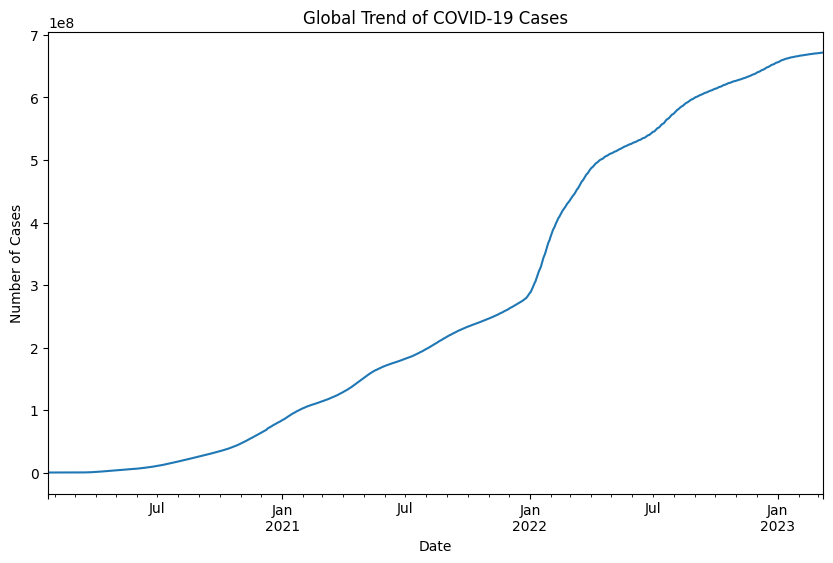

In [13]:
plt.figure(figsize=(10, 6))
global_cases = covid_data.groupby('Date')['Cases'].sum()
global_cases.plot()
plt.title('Global Trend of COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()

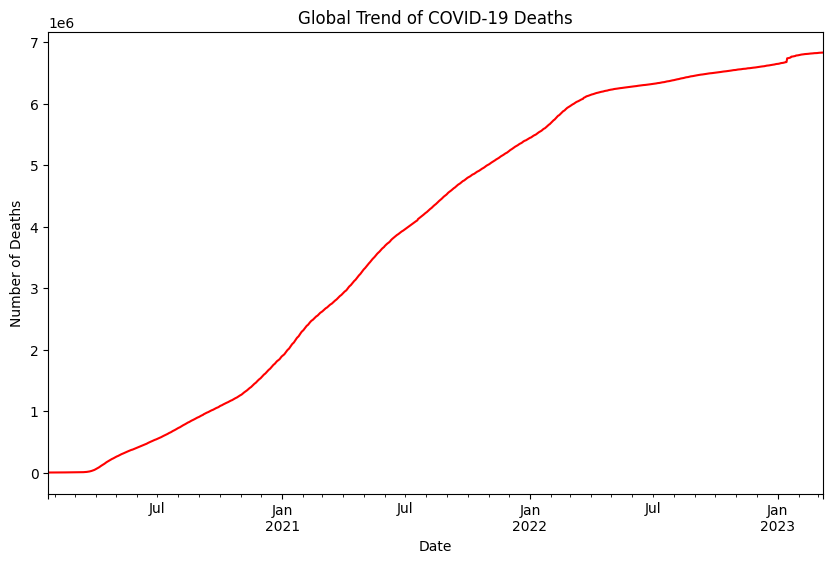

In [14]:
plt.figure(figsize=(10, 6))
global_deaths = covid_data.groupby('Date')['Deaths'].sum()
global_deaths.plot(color='red')
plt.title('Global Trend of COVID-19 Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.show()

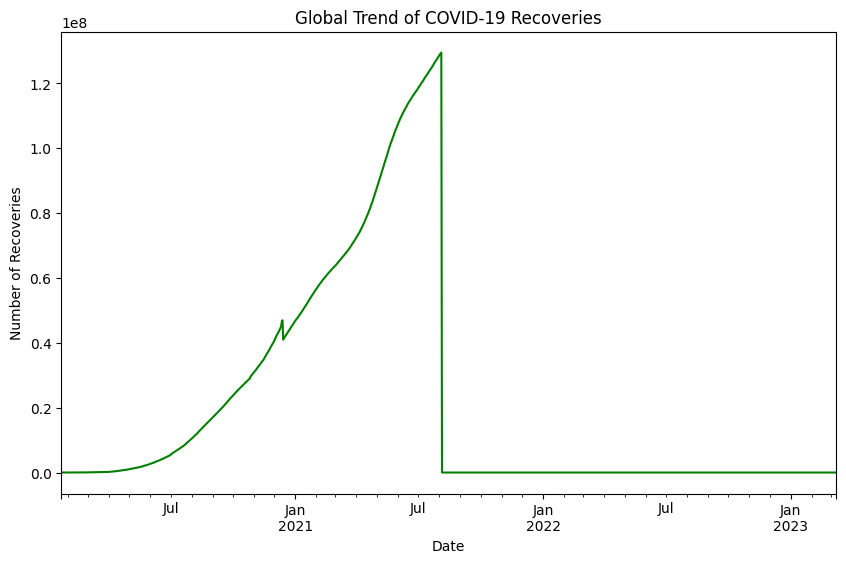

In [15]:
plt.figure(figsize=(10, 6))
global_recovered = covid_data.groupby('Date')['Recovered'].sum()
global_recovered.plot(color='green')
plt.title('Global Trend of COVID-19 Recoveries')
plt.xlabel('Date')
plt.ylabel('Number of Recoveries')
plt.show()

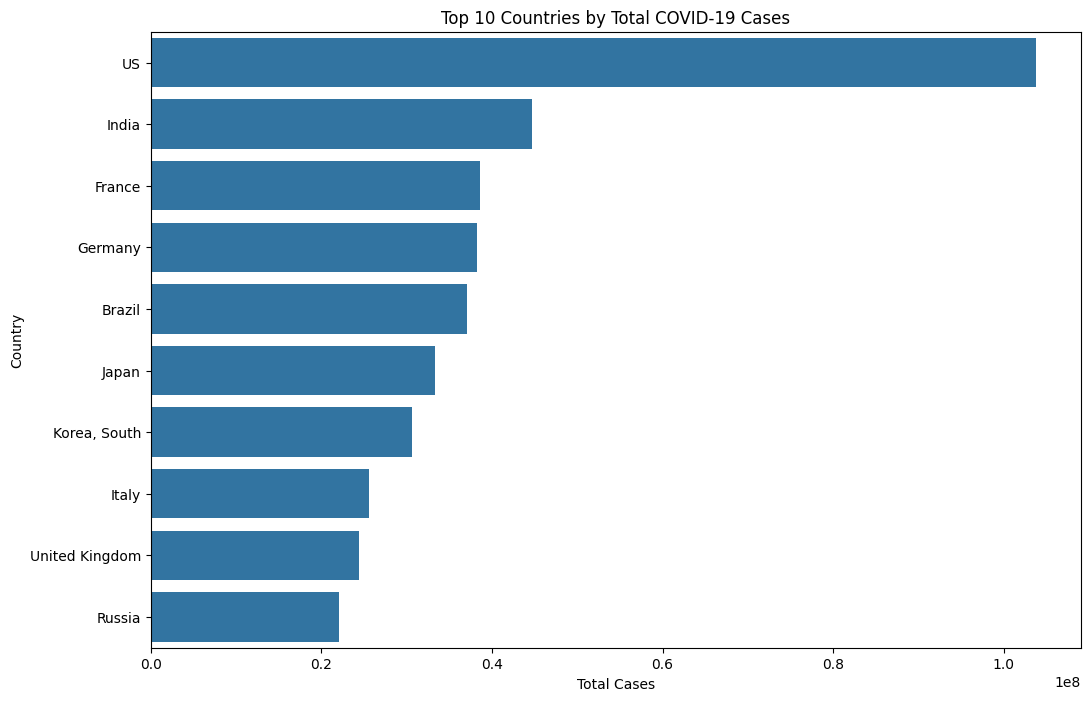

In [16]:
top_countries = covid_data.groupby('Country/Region')['Cases'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()

In [17]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-17-1902369eb8ba>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [19]:
latest_data = covid_data[covid_data['Date'] == covid_data['Date'].max()]
world = world.merge(latest_data, how='left', left_on='name', right_on='Country/Region')

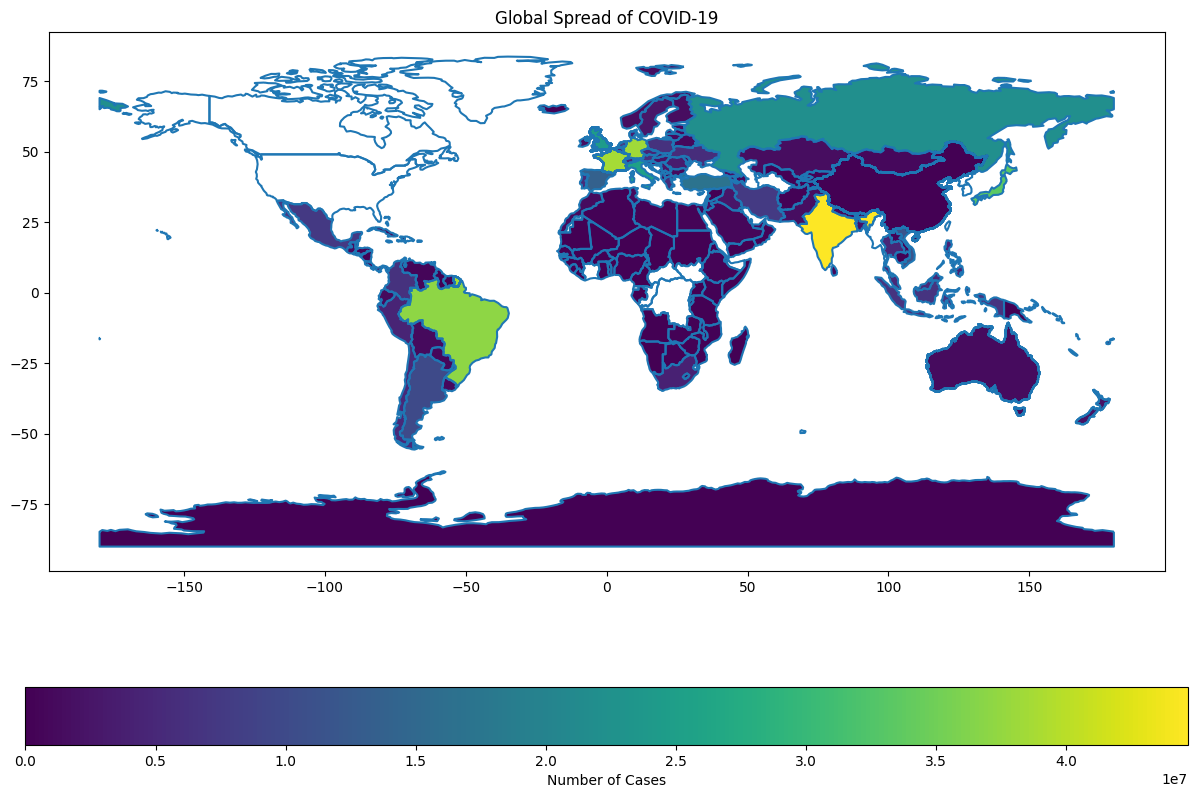

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Cases', ax=ax, legend=True,
           legend_kwds={'label': "Number of Cases",
                        'orientation': "horizontal"})
plt.title('Global Spread of COVID-19')
plt.show()